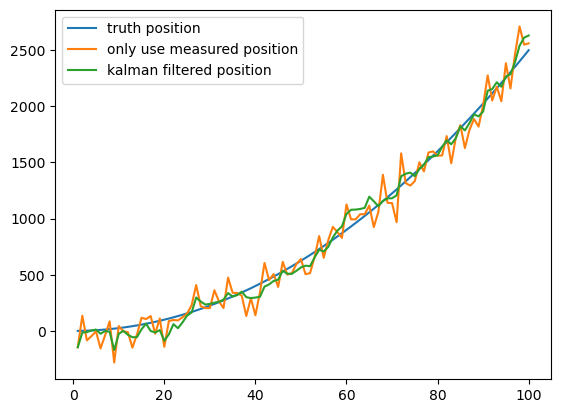

In [1]:
# -*- coding: utf-8 -*-
"""
@司南牧 
"""
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(1,100,100) # 在1~100s内采样100次
a = 0.5 # 加速度值
position = (a * t**2)/2

position_noise = position+np.random.normal(0,120,size=(t.shape[0])) # 模拟生成GPS位置测量数据（带噪声）
plt.plot(t,position,label='truth position')
plt.plot(t,position_noise,label='only use measured position')


#---------------卡尔曼滤波----------------
# 初始的估计导弹的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]

predict_var = 0
odo_var = 120**2 #这是我们自己设定的位置测量仪器的方差，越大则测量值占比越低
v_std = 50 # 测量仪器的方差（这个方差在现实生活中是需要我们进行传感器标定才能算出来的，可搜Allan方差标定）
for i in range(1,t.shape[0]):
  
    dv =  (position[i]-position[i-1]) + np.random.normal(0,50) # 模拟从IMU读取出的速度
    position_predict = position_predict + dv # 利用上个时刻的位置和速度预测当前位置
    predict_var += v_std**2 # 更新预测数据的方差
    # 下面是Kalman滤波
    position_predict = position_predict*odo_var/(predict_var + odo_var)+position_noise[i]*predict_var/(predict_var + odo_var)
    predict_var = (predict_var * odo_var)/(predict_var + odo_var)
    predicts.append(position_predict)

    
plt.plot(t,predicts,label='kalman filtered position')

plt.legend()
plt.show()